In [9]:
import pandas as pd
import mplfinance as mpf
import matplotlib.dates as mdates

# Read in daily data for NSE TCS

In [10]:
infile = 'data/t_data.csv'
df = pd.read_csv(infile, index_col=0, parse_dates=True)

In [11]:
#Calculation For Simple Moving Average For Length 34 as Long SMA
df['SMA34'] = df['Close'].rolling(window=34).mean()

In [12]:
#Calculation For Simple Moving Average For Length 5 as Short SMA
df['SMA5'] = df['Close'].rolling(window=5).mean()

In [13]:
# Awesome_Oscillator Column Assign To df
df['AO'] = df['SMA5'] - df['SMA34']

In [43]:
# Function For Generate Color Awesome_oscillator
def generate_awesome_oscillator_color(df):
    awesome_oscillator_color = []
    awesome_oscillator_color.clear()
    for i in range (0,len(df["AO"])):
        if df["AO"][i] >= 0 and df["AO"][i-1] < df["AO"][i]:
            awesome_oscillator_color.append('#26A69A')
            #print(i,'green')
        elif df["AO"][i] >= 0 and df["AO"][i-1] > df["AO"][i]:
            awesome_oscillator_color.append('#FF5252')
            #print(i,'faint green')
        elif df["AO"][i] < 0 and df["AO"][i-1] > df["AO"][i] :
            #print(i,'red')
            awesome_oscillator_color.append('#FF5252')
        elif df["AO"][i] < 0 and df["AO"][i-1] < df["AO"][i] :
            #print(i,'faint red')
            awesome_oscillator_color.append('#26A69A')
        else:
            awesome_oscillator_color.append('#000000')
    return awesome_oscillator_color

In [44]:
# List of Color Assiging To Awesome Oscillator
awesome_oscillator_color = generate_awesome_oscillator_color(df)

In [45]:
awesome_oscillator = df[['AO']]

In [46]:
ao = [
    mpf.make_addplot(awesome_oscillator,type='bar',width=0.7,color=awesome_oscillator_color,panel=1,alpha=1,secondary_y=True)
]

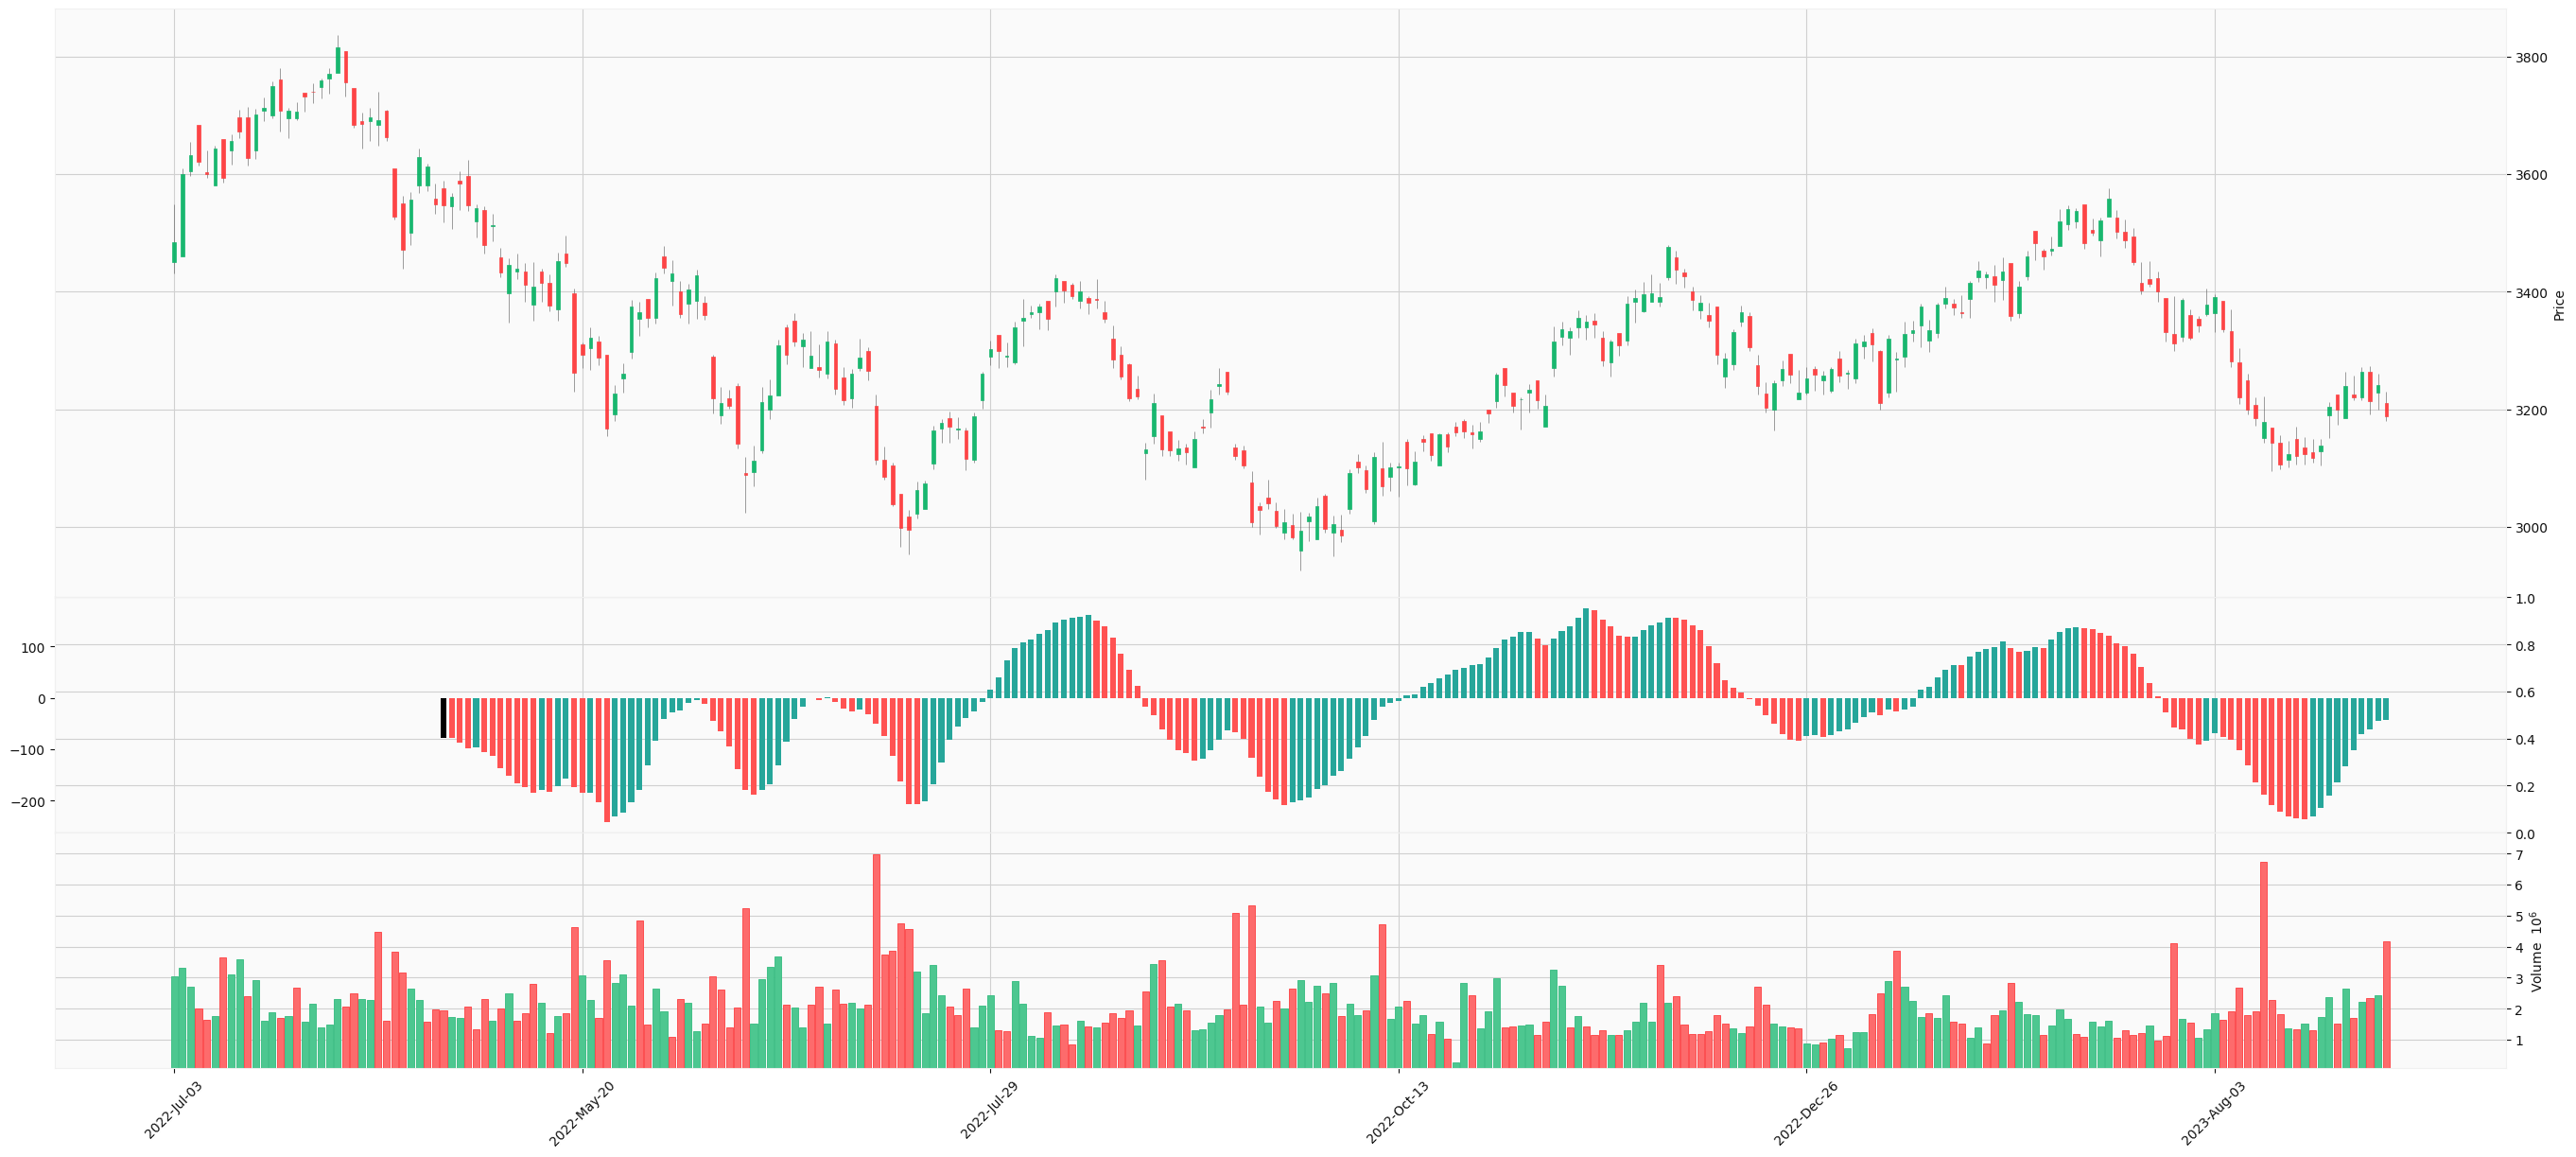

In [47]:
mpf.plot(
    df,
    volume=True,
    volume_panel = 2,
    type="candle", 
    style="yahoo",
    addplot=ao,
    figscale=1.2,
    figsize=(36,16,)
)